Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [1]:
# imports
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.to_categorical(lbl_test, num_classes)


In [4]:

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.7787 - accuracy: 0.7827 - val_loss: 0.2583 - val_accuracy: 0.9245
Epoch 2/10
469/469 [==============================] - 0s 550us/step - loss: 0.2402 - accuracy: 0.9295 - val_loss: 0.1849 - val_accuracy: 0.9473
Epoch 3/10
469/469 [==============================] - 0s 548us/step - loss: 0.1796 - accuracy: 0.9478 - val_loss: 0.1509 - val_accuracy: 0.9561
Epoch 4/10
469/469 [==============================] - 0s 550us/step - loss: 0.1430 - accuracy: 0.9591 - val_loss: 0.1355 - val_accuracy: 0.9578
Epoch 5/10
469/469 [==============================] - 0s 549us/step - loss: 0.1239 - accuracy: 0.9631 - val_loss: 0.1277 - val_accuracy: 0.9614
Epoch 6/10
469/469 [==============================] - 0s 550us/step - loss: 0.1046 - accuracy: 0.9696 - val_loss: 0.1108 - val_accuracy: 0.9663
Epoch 7/10
469/469 [==============================] - 0s 554us/step - loss: 0.0947 - accuracy: 0.9723 - val_loss: 0.1055 - val_accuracy: 0

In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9), metrics=['accuracy'])

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.4300 - accuracy: 0.8664 - val_loss: 0.1058 - val_accuracy: 0.9697
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1048 - accuracy: 0.9693 - val_loss: 0.0840 - val_accuracy: 0.9733
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0748 - accuracy: 0.9775 - val_loss: 0.0681 - val_accuracy: 0.9784
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0517 - accuracy: 0.9856 - val_loss: 0.0538 - val_accuracy: 0.9819
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0424 - accuracy: 0.9881 - val_loss: 0.0504 - val_accuracy: 0.9836
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0351 - accuracy: 0.9901 - val_loss: 0.0444 - val_accuracy: 0.9851
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0283 - accuracy: 0.9920 - val_loss: 0.0427 - val_accuracy: 0.9847

## 3
### a
First we have a convolutional layer, a max pooling layer and flatten it out to find and provide features that we then can examine to get a result. We then have a dense layer and one output layer with 10 nodes that uses the softmax activation function that decides between the 10 nodes.

### b
Convolutional layers outperform fully connected layers in this case, image classification (explain why)

### Question 4) Auto-Encoder for denoising


## 4
### a

In [6]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [7]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))


Epoch 1/32
938/938 [==============================] - 1s 1ms/step - loss: 0.2434 - val_loss: 0.1507
Epoch 2/32
938/938 [==============================] - 1s 1ms/step - loss: 0.1480 - val_loss: 0.1386
Epoch 3/32
938/938 [==============================] - 1s 1ms/step - loss: 0.1368 - val_loss: 0.1330
Epoch 4/32
938/938 [==============================] - 1s 1ms/step - loss: 0.1314 - val_loss: 0.1293
Epoch 5/32
938/938 [==============================] - 1s 1ms/step - loss: 0.1280 - val_loss: 0.1282
Epoch 6/32
938/938 [==============================] - 1s 1ms/step - loss: 0.1258 - val_loss: 0.1264
Epoch 7/32
938/938 [==============================] - 1s 1ms/step - loss: 0.1239 - val_loss: 0.1248
Epoch 8/32
938/938 [==============================] - 1s 1ms/step - loss: 0.1226 - val_loss: 0.1248
Epoch 9/32
938/938 [==============================] - 1s 1ms/step - loss: 0.1216 - val_loss: 0.1238
Epoch 10/32
938/938 [==============================] - 1s 1ms/step - loss: 0.1207 - val_loss: 0.1236

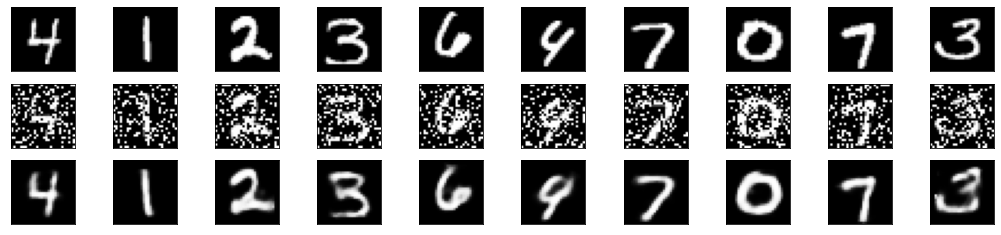

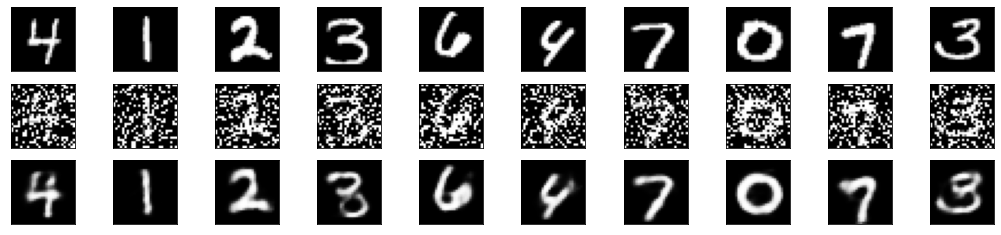

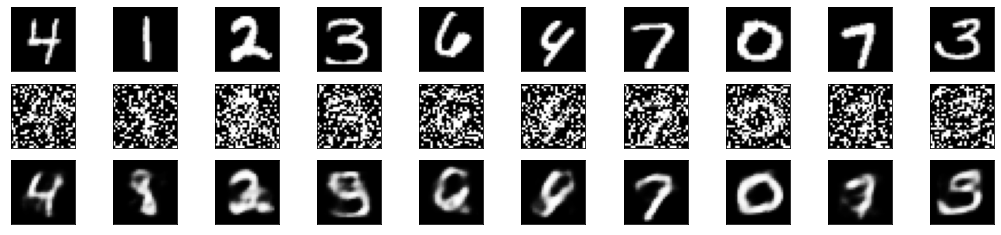

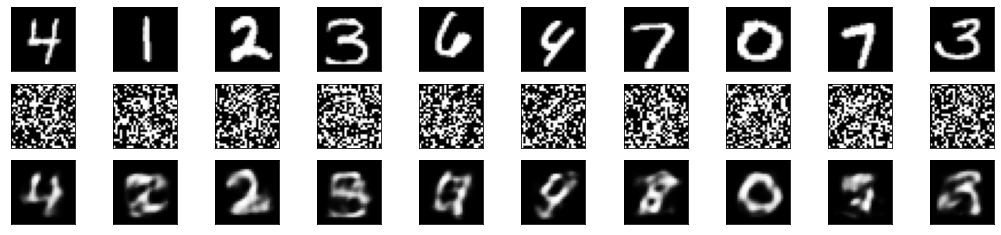

In [9]:
num_images = 10
np.random.seed(45)
random_test_images = np.random.randint(flattened_x_train.shape[0], size=num_images)

seasoned_imgs = []
seasoned_imgs.append(salt_and_pepper(flattened_x_train, noise_level=0.4))
seasoned_imgs.append(salt_and_pepper(flattened_x_train, noise_level=0.5))
seasoned_imgs.append(salt_and_pepper(flattened_x_train, noise_level=0.6))
seasoned_imgs.append(salt_and_pepper(flattened_x_train, noise_level=0.7))

for seasoned in seasoned_imgs:

    decoded_imgs = autoencoder.predict(seasoned)
    
    plt.figure(figsize=(18, 4))

    for i, image_idx in enumerate(random_test_images):
        ax = plt.subplot(3, num_images, i + 1)
        plt.imshow(flattened_x_train[image_idx].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, num_images, num_images + i + 1)
        plt.imshow(seasoned[image_idx].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, num_images, 2*num_images + i + 1)
        plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

### b

I have problem seeing the seasoned picture after 0.4, so in all 3 bottom examples. For the denoising it seems like it starts to get some weird results from 0.6, but very few. At 0.7 however there is a lot of problems and the majority of the pictures are ruined, We would therefore suggest that denoising works at 0.6 but stops working at 0.7

In [ ]:
noise = [0.4, 0.5, 0.6, 0.7]

result_season = []
result_decoded = []

for i in noise:
    
    seasoned_train = salt_and_pepper(flattened_x_train, noise_level=i) 
    seasoned_test = salt_and_pepper(flattened_x_test, noise_level=i) 
    decoded_train = autoencoder.predict(seasoned_train)
    decoded_test = autoencoder.predict(seasoned_test)

    fit_info = model.fit(seasoned_train.reshape(-1, 28, 28, 1), y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(seasoned_test.reshape(-1, 28, 28, 1), y_test))
    score = model.evaluate(seasoned_test.reshape(-1, 28, 28, 1), y_test, verbose=0)
    result_season.append(score[1])
    
    fit_info = model.fit(decoded_train.reshape(-1, 28, 28, 1), y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(decoded_test.reshape(-1, 28, 28, 1), y_test))
    score = model.evaluate(decoded_test.reshape(-1, 28, 28, 1), y_test, verbose=0)
    result_decoded.append(score[1])
    

plt.plot(noise, result_season, label = "Seasoned")
plt.plot(noise, result_decoded, label = "Decoded")
plt.legend()
plt.show()

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.5139 - accuracy: 0.8386 - val_loss: 0.3177 - val_accuracy: 0.8965
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2720 - accuracy: 0.9110 - val_loss: 0.2986 - val_accuracy: 0.8986
Epoch 3/10
469/469 [==============================] - 5s 12ms/step - loss: 0.2075 - accuracy: 0.9342 - val_loss: 0.2884 - val_accuracy: 0.9051
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1668 - accuracy: 0.9464 - val_loss: 0.2785 - val_accuracy: 0.9075
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1282 - accuracy: 0.9607 - val_loss: 0.2947 - val_accuracy: 0.9028
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0961 - accuracy: 0.9717 - val_loss: 0.3001 - val_accuracy: 0.9078
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0687 - accuracy: 0.9818 - val_loss: 0.2939 - val_accuracy: 0.9126

The decoded version is better all the way until 0.7 where seasoned is better. However that was the point where the decoder stopped working, so it is in fact better as long as it works.